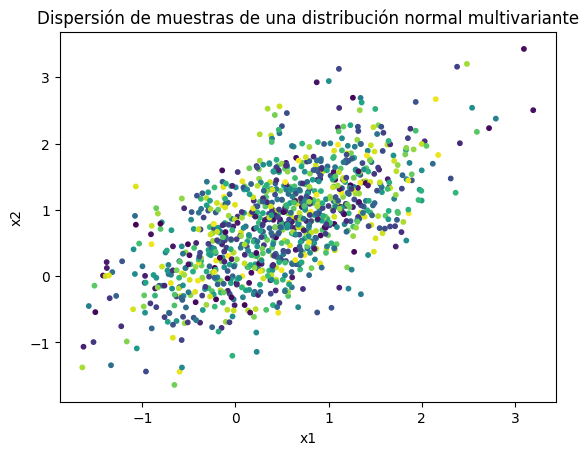

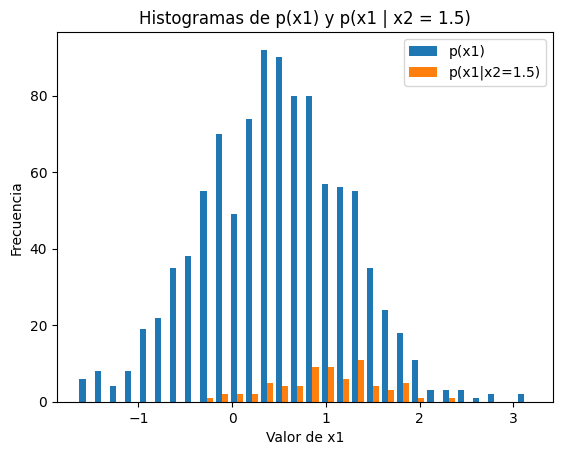

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

###############################################################################
# Parámetros para la generación de datos
# ----------------------------------------------------------------------------
N = 1000  # Número de muestras a generar
mean = [0.5, 0.8]  # Media de la distribución multivariante
cov = [[0.5, 0.3], [0.3, 0.5]]  # Matriz de covarianza de la distribución multivariante

###############################################################################
# Generación de muestras de una distribución normal multivariante
# ----------------------------------------------------------------------------
# Generar N muestras de una distribución normal multivariante con la media y 
# covarianza especificadas
X = np.random.multivariate_normal(mean, cov, size=N, check_valid='warn', tol=1e-8)

# Separar las muestras en dos variables x1 y x2
x1 = X[:, 0]  # Primer componente de las muestras
x2 = X[:, 1]  # Segundo componente de las muestras

# Graficar un scatter plot de las muestras generadas
plt.scatter(x1, x2, c=y, s=10)
plt.title("Dispersión de muestras de una distribución normal multivariante")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

###############################################################################
# Filtrar puntos de x1 tales que x2 esté cerca de 1.5
# ----------------------------------------------------------------------------
# Filtrar valores de x1 donde x2 está en el rango (1.4, 1.6)
x1_cond = [x for i, x in enumerate(x1) if 1.4 < x2[i] < 1.6]

###############################################################################
# Graficar histogramas comparativos
# ----------------------------------------------------------------------------
# Graficar histogramas de las distribuciones originales de x1 y la condicionada en x2 = 1.5
plt.hist([x1, x1_cond], label=['p(x1)', 'p(x1|x2=1.5)'], bins=30)
plt.title("Histogramas de p(x1) y p(x1 | x2 = 1.5)")
plt.xlabel("Valor de x1")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()


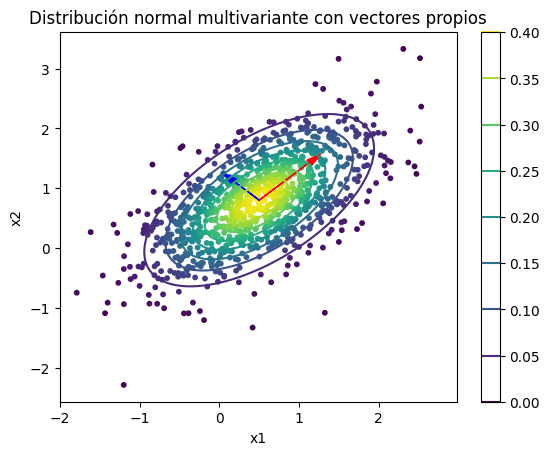

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

###############################################################################
# Cálculo de valores y vectores propios
# ----------------------------------------------------------------------------
# Calculamos los valores propios (val_p) y los vectores propios (vec_p) de la 
# matriz de covarianza (cov). Estos son útiles para analizar la orientación 
# y la dispersión de la distribución multivariante.
val_p, vec_p = np.linalg.eig(cov)

###############################################################################
# Evaluación de la densidad de probabilidad para cada punto
# ----------------------------------------------------------------------------
# Evaluamos la función de densidad de probabilidad (PDF) en los puntos generados 
# en X, usando la media (mean) y la covarianza (cov) de la distribución.
# Esto se utiliza para asignar un color a cada punto en la gráfica.
y = multivariate_normal.pdf(X, mean, cov)

###############################################################################
# Creación de la rejilla para la visualización de contornos
# ----------------------------------------------------------------------------
# Definimos una rejilla de valores en el espacio (eje_x1, eje_x2) sobre la cual
# evaluaremos la densidad de probabilidad para graficar los contornos.
delta = 0.025  # Resolución de la rejilla
eje_x1 = np.arange(-2, 3, delta)  # Rango de valores para el eje x1
eje_x2 = np.arange(-2, 3, delta)  # Rango de valores para el eje x2
X_m, Y_m = np.meshgrid(eje_x1, eje_x2)  # Crear la rejilla bidimensional

# Convertimos la rejilla en una lista de puntos (M) para evaluar la densidad de 
# probabilidad en cada punto de la rejilla.
M = np.c_[X_m.reshape(-1, 1), Y_m.reshape(-1, 1)]
Z = multivariate_normal.pdf(M, mean, cov)  # Evaluación de la PDF en la rejilla

###############################################################################
# Gráfica de la distribución multivariante
# ----------------------------------------------------------------------------
# Graficamos los puntos generados con un scatter plot, donde el color de cada 
# punto es determinado por su densidad de probabilidad.
plt.scatter(x1, x2, c=y, s=10)

# Sobre la gráfica, dibujamos los contornos de la función de densidad de 
# probabilidad, lo cual nos da una mejor idea de la distribución de los puntos.
plt.contour(X_m, Y_m, Z.reshape(len(eje_x1), len(eje_x1)))

# Agregamos una barra de color que indica los valores de la densidad de probabilidad.
plt.colorbar()

# Dibujamos flechas que representan los vectores propios escalados por la raíz 
# cuadrada de los valores propios. Estas flechas indican la dirección y magnitud 
# de la dispersión de los datos en la distribución.
plt.arrow(mean[0], mean[1], vec_p[0][0]*np.sqrt(val_p[0]), vec_p[1][0]*np.sqrt(val_p[0]), 
          color='red', head_width=0.1, head_length=0.2, label="Vector propio 1")
plt.arrow(mean[0], mean[1], vec_p[0][1]*np.sqrt(val_p[1]), vec_p[1][1]*np.sqrt(val_p[1]), 
          color='blue', head_width=0.1, head_length=0.2, label="Vector propio 2")

plt.title("Distribución normal multivariante con vectores propios")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
